##### Análise das matriculas atendidas pelo Pronatec na Rede EPCT
Fonte base de dados: https://dados.gov.br/dados/conjuntos-dados/pronatec---rede-federal-de-epct

Pontos para analisar:
- As matriculas aumentaram ou diminuiram ao longo dos anos?
- Quantidade de cursos que terminam por ano
- Contagem de unidades por estado
- Quantas unidades únicas existem?
- Quantos cursos unicos existem?
- Cursos presenciais representam quantos porcentos?
- Comparação de cursos presenciais e ead por estado
- Contagem de unidades por região
- Contagem do tipo de oferta
- Tipo de oferta por regiao
- 5 cursos com mais matriculas

#### Importações e Tratamento dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
epct_df = pd.read_csv('pda-matriculas-atendidas-rede-federal-epct-2017.csv', encoding='cp1252', on_bad_lines='skip', sep=';')
epct_df.head(2)

C:\Users\vinic\AppData\Local\Temp\ipykernel_18352\3200014228.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  epct_df = pd.read_csv('pda-matriculas-atendidas-rede-federal-epct-2017.csv', encoding='cp1252', on_bad_lines='skip', sep=';')


,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO,CODIGO_IDENTIFICACAO_MEC,CPF_ALUNO,CODIGO_UNIDADE,NOME_UNIDADE,TIPO_OFERTA,NOME_CURSO,TIPO_CURSO,NOME_MODALIDADE,NOME_REGIAO_UNIDADE_ENSINO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,NOME_MESORREGIAO_UNID_ENS,NOME_MICRORREGIAO_UNID_ENS
0,2017,2017,73684575,***210791**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
1,2017,2017,73684579,***294361**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília


In [3]:
epct_df = epct_df.drop(['CODIGO_IDENTIFICACAO_MEC', 'CPF_ALUNO', 'CODIGO_UNIDADE', 'NOME_MICRORREGIAO_UNID_ENS'], axis=1)
epct_df.head(1)

,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO,NOME_UNIDADE,TIPO_OFERTA,NOME_CURSO,TIPO_CURSO,NOME_MODALIDADE,NOME_REGIAO_UNIDADE_ENSINO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,NOME_MESORREGIAO_UNID_ENS
0,2017,2017,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal


In [4]:
epct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188858 entries, 0 to 188857
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ANO_INICIO_CURSO               188858 non-null  int64 
 1   ANO_PREVISTO_TERMINO_CURSO     188858 non-null  int64 
 2   NOME_UNIDADE                   188858 non-null  object
 3   TIPO_OFERTA                    188858 non-null  object
 4   NOME_CURSO                     188858 non-null  object
 5   TIPO_CURSO                     188858 non-null  object
 6   NOME_MODALIDADE                188858 non-null  object
 7   NOME_REGIAO_UNIDADE_ENSINO     188858 non-null  object
 8   SIGLA_UF_UNIDADE_ENSINO        188858 non-null  object
 9   NOME_MUNICIPIO_UNIDADE_ENSINO  188858 non-null  object
 10  NOME_MESORREGIAO_UNID_ENS      188858 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.8+ MB


In [5]:
epct_df.describe().round(0)

,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO
count,188858.0,188858.0
mean,2015.0,2016.0
std,2.0,1.0
min,2004.0,2006.0
25%,2014.0,2016.0
50%,2015.0,2017.0
75%,2017.0,2017.0
max,2017.0,2022.0


#### As matriculas aumentaram ou diminuiram ao longo dos anos?

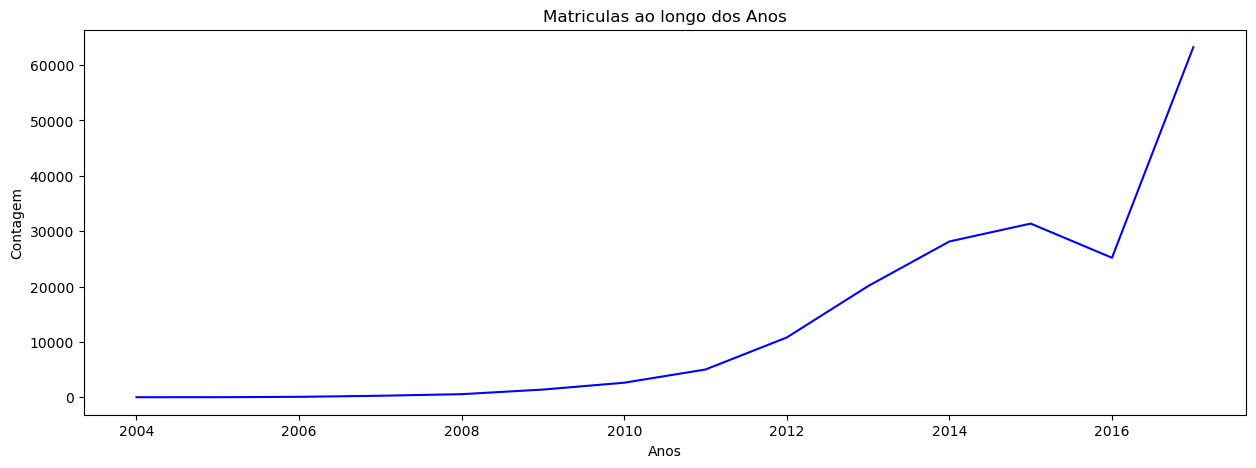

In [6]:
plt.figure(figsize=(15,5))
matriculas = epct_df['ANO_INICIO_CURSO'].value_counts().sort_index()
matriculas.plot(kind='line', color='b')
plt.title('Matriculas ao longo dos Anos')
plt.xlabel('Anos')
plt.ylabel('Contagem')
plt.show()

**É possível perceber que as matrículas aumentaram com o passar dos anos e a expectativa é de que continue a aumentar**

#### Quantidade de cursos que terminam por ano

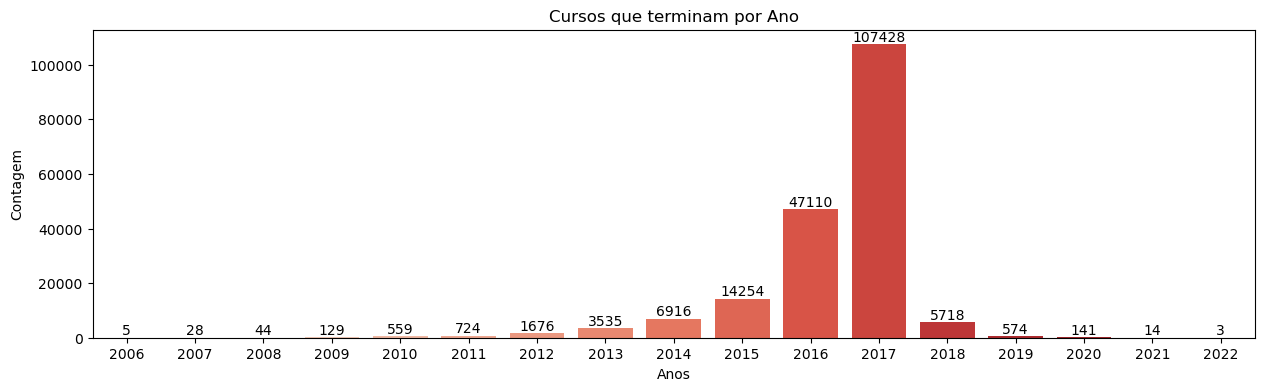

In [7]:
plt.figure(figsize=(15,4))
#fim_curso = epct_df['ANO_PREVISTO_TERMINO_CURSO'].value_counts()
fim_curso = sns.countplot(epct_df['ANO_PREVISTO_TERMINO_CURSO'], palette=sns.color_palette('Reds', 17))
plt.title('Cursos que terminam por Ano')
plt.xlabel('Anos')
plt.ylabel('Contagem')
for i in fim_curso.containers:
   fim_curso.bar_label(i,)
plt.show()

**2017 foi o ano com mais cursos concluídos**

#### Contagem de unidades por estado

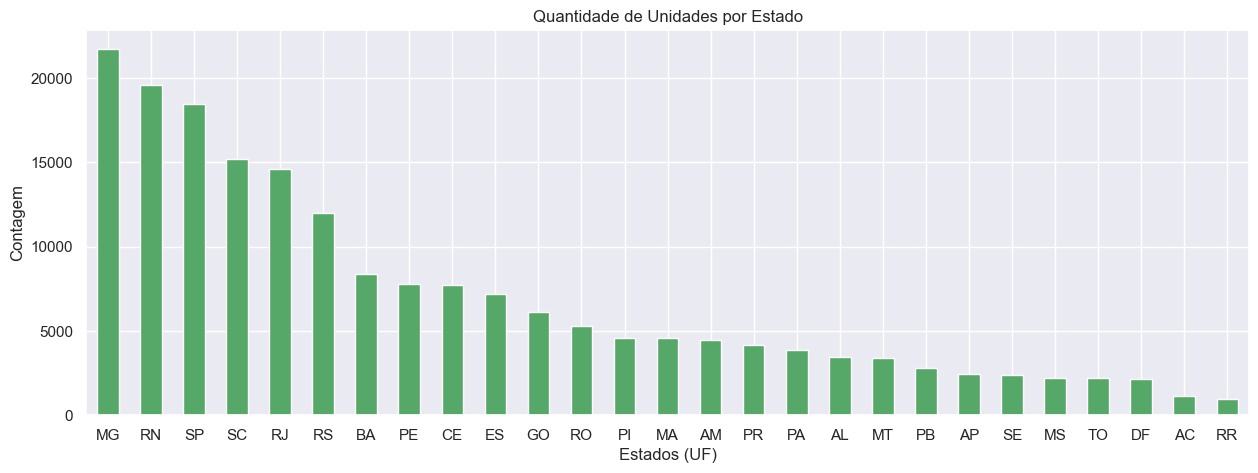

In [8]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')

unidades_uf = epct_df['SIGLA_UF_UNIDADE_ENSINO'].value_counts()
unidades_uf.plot(kind='bar', color='g')
plt.title('Quantidade de Unidades por Estado')
plt.xlabel('Estados (UF)')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

**Minas Gerais é o estado com mais unidades EPCT**

#### Quantas unidades únicas existem?

In [9]:
num_unidades = len(epct_df['NOME_UNIDADE'].unique())
display(f'A quantidade de unidades é de: {num_unidades}')

'A quantidade de unidades é de: 621'

#### Quantos cursos únicos existem?

In [10]:
num_cursos = len(epct_df['NOME_CURSO'].unique())
display(f'A quantidade de cursos é: {num_cursos}')

'A quantidade de cursos é: 516'

#### Cursos presenciais representam quantos porcentos?

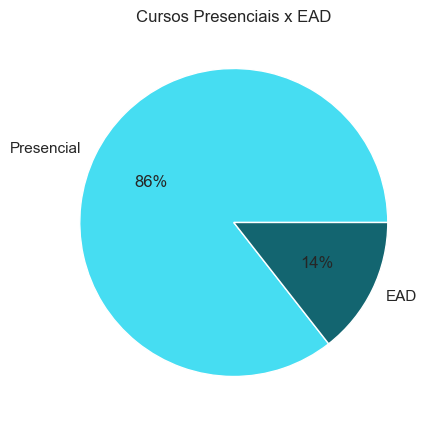

In [11]:
plt.figure(figsize=(15,5))
presencial = epct_df[epct_df['NOME_MODALIDADE'] == 'Educação Presencial']['NOME_MODALIDADE'].count()
ead = epct_df[epct_df['NOME_MODALIDADE'] != 'Educação Presencial']['NOME_MODALIDADE'].count()
grafico_modalidade = plt.pie(x=[presencial, ead], labels=['Presencial', 'EAD'], autopct='%.0f%%', colors=['#46ddf2', '#136570'])
plt.title('Cursos Presenciais x EAD')
plt.show()

**Cursos presenciais são a maioria e representam 86%**

#### Comparação de cursos presenciais e ead por estado

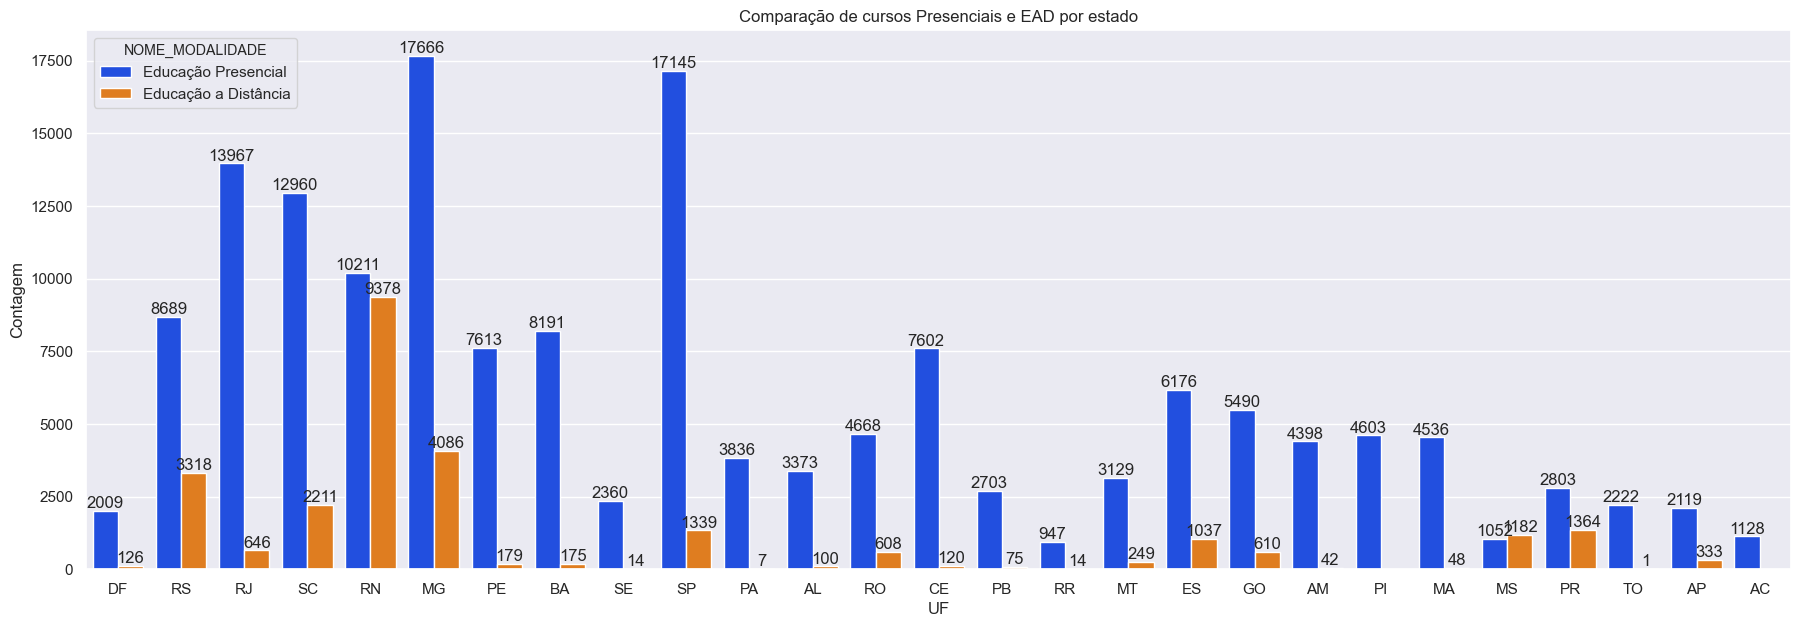

In [12]:
plt.figure(figsize=(22,7))
modalidade_uf = sns.countplot(data=epct_df, x='SIGLA_UF_UNIDADE_ENSINO', hue='NOME_MODALIDADE', palette=sns.color_palette('bright'))
plt.title('Comparação de cursos Presenciais e EAD por estado')
plt.xlabel('UF')
plt.ylabel('Contagem')
for i in modalidade_uf.containers:
   modalidade_uf.bar_label(i,)
plt.show()

**Alguns estados não possuem a modalidade de Ensino a Distânica; RN é o estado que equilibra a quantidade de cursos Presenciais com cursos EAD**

#### Contagem de unidades por região

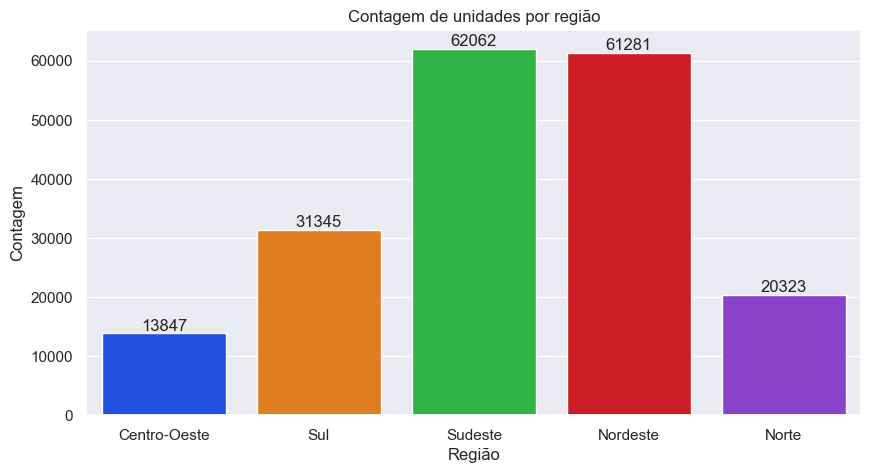

In [13]:
plt.figure(figsize=(10,5))
unidades_regiao = sns.countplot(data=epct_df, x='NOME_REGIAO_UNIDADE_ENSINO', palette=sns.color_palette('bright'))
plt.title('Contagem de unidades por região')
plt.xlabel('Região')
plt.ylabel('Contagem')
for i in unidades_regiao.containers:
   unidades_regiao.bar_label(i,)
plt.show()

**As unidades estão concentradas nas regiões Sudeste e Nordeste**

#### Contagem do tipo de oferta

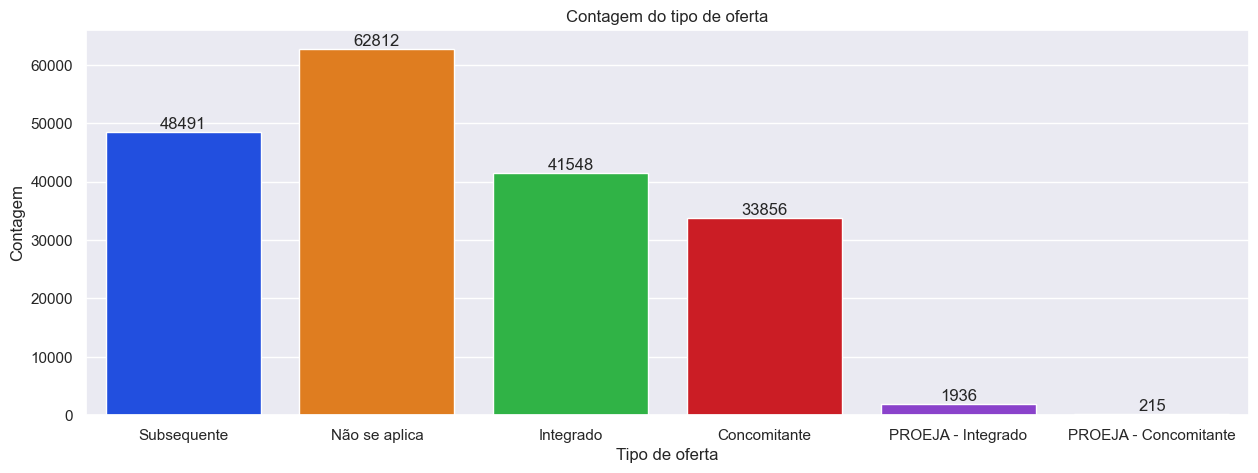

In [14]:
plt.figure(figsize=(15,5))
oferta = sns.countplot(epct_df['TIPO_OFERTA'], palette=sns.color_palette('bright'))
plt.title('Contagem do tipo de oferta')
plt.xlabel('Tipo de oferta')
plt.ylabel('Contagem')
for i in oferta.containers:
   oferta.bar_label(i,)
plt.show()

#### Tipo de oferta por regiao

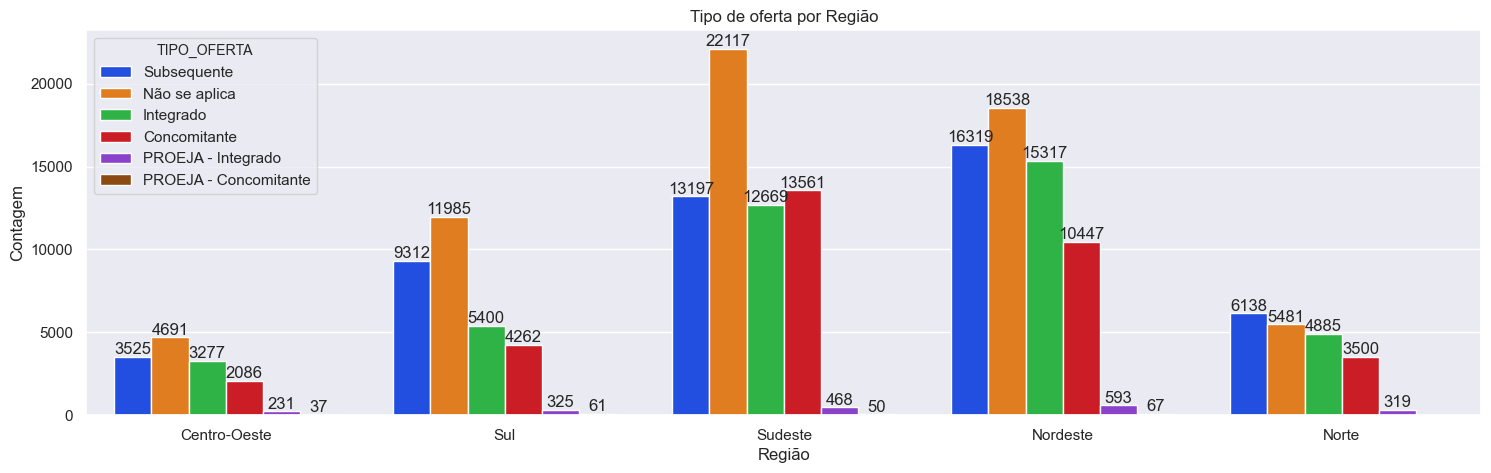

In [15]:
plt.figure(figsize=(18,5))
oferta_regiao = sns.countplot(data=epct_df, x='NOME_REGIAO_UNIDADE_ENSINO', hue='TIPO_OFERTA', palette=sns.color_palette('bright'))
plt.title('Tipo de oferta por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
for i in oferta_regiao.containers:
   oferta_regiao.bar_label(i,)
plt.show()

#### 5 cursos com mais matriculas

<AxesSubplot:>

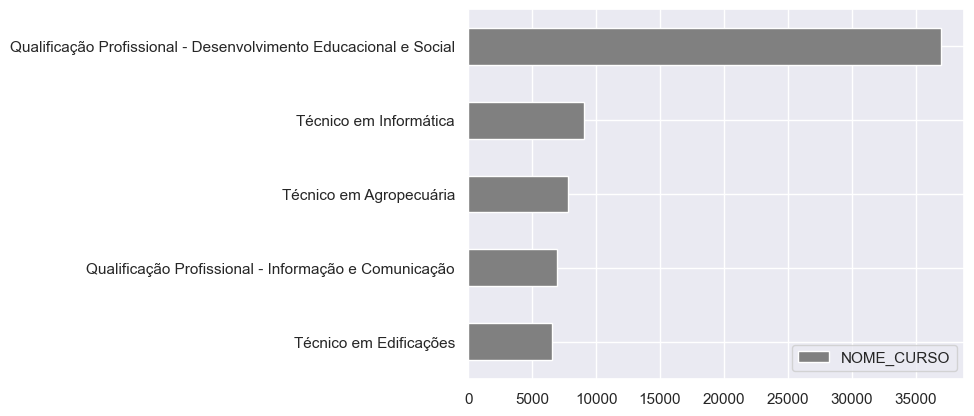

In [16]:
top_cursos = epct_df['NOME_CURSO'].value_counts(ascending=True).to_frame()
top_cursos.tail().plot(kind='barh', color='gray')